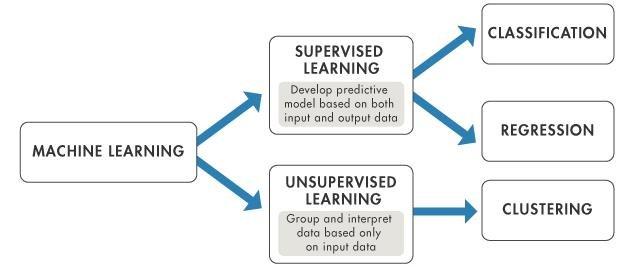

# **TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE**

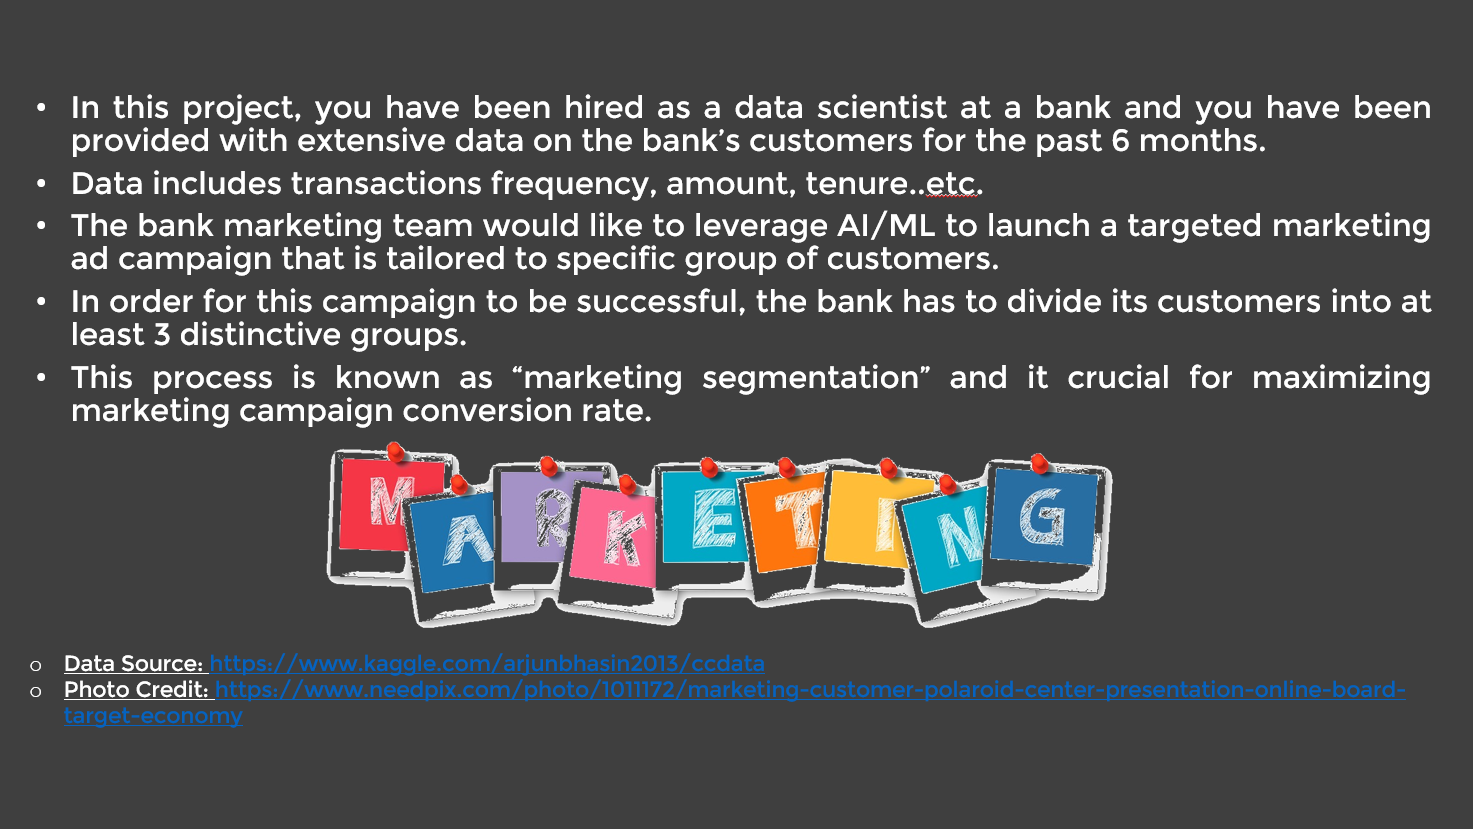

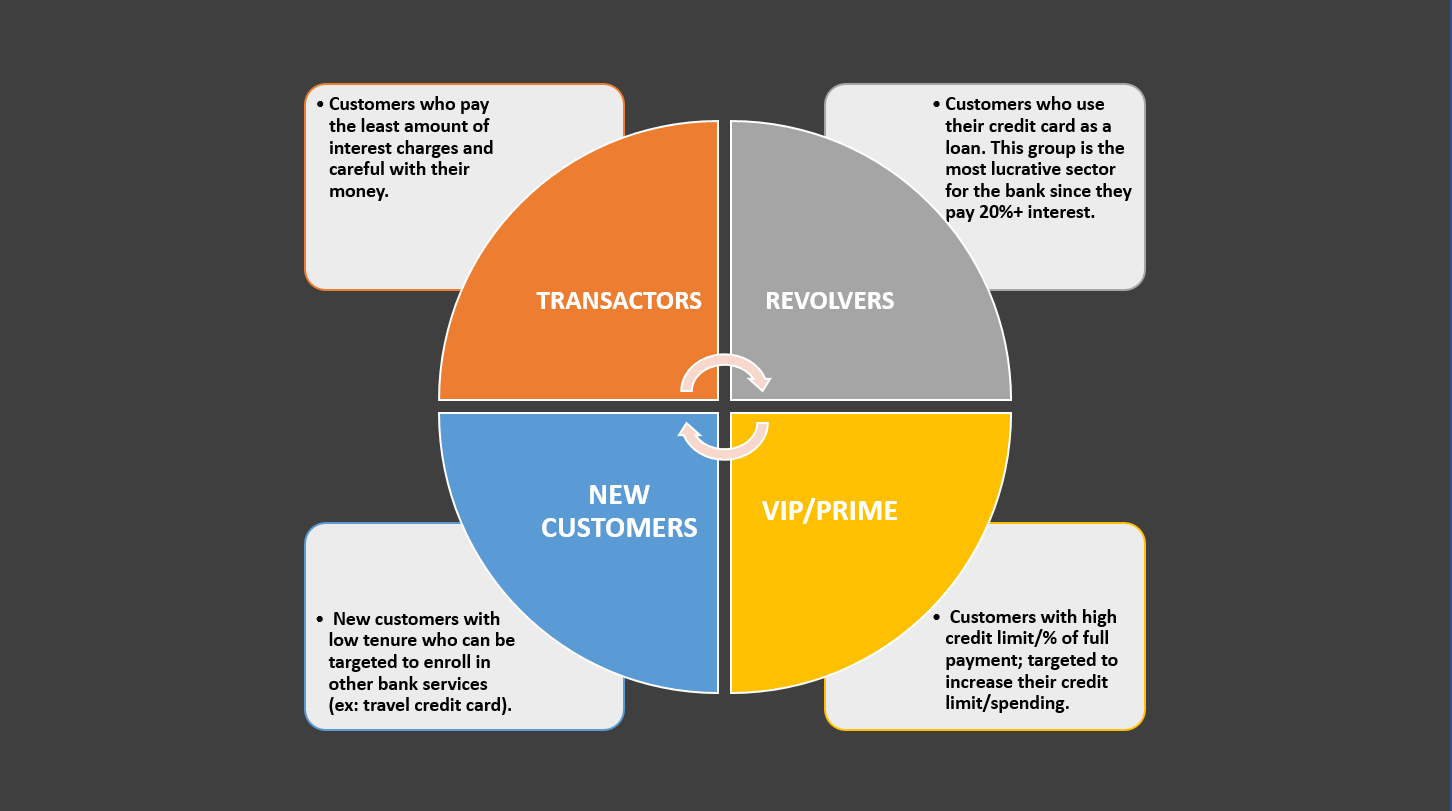

# **TASK #2: IMPORT LIBRAIRIES AND DATASETS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('marketing_data.csv')
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure(mandat) of credit card service for user

In [3]:
creditcard_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
creditcard_df.TENURE.describe()

count    8950.000000
mean       11.517318
std         1.338331
min         6.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: TENURE, dtype: float64

In [5]:
creditcard_df.info()
#let's apply info and get additional insights on our dataframe
# 18 features with 8950

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()
# let's apply describe() and get more statistical insights on our dataframe
# mean balance is $1564
#Balance frequency is frequently updated on average ~ 0.9
#Purchases average is $1000
# one off purchase average is ~$600
#Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
#Average credit limit ~ 4500
#percent of full payement is 15%


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

# **TASK #3: VISUALIZE AND EXPLORE DATASET**

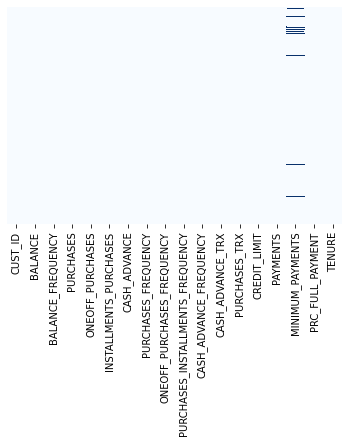

In [7]:
#let 's see if we have any missing data
sns.heatmap(creditcard_df.isnull(),yticklabels = False, cbar = False, cmap="Blues" )

In [8]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYEMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [10]:
#fill up the missing elements with the mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [11]:
#double check that no missing values are present
creditcard_df['CREDIT_LIMIT'].isnull().sum()

0

In [12]:
#let s see if we have duplicated entries in the data
creditcard_df.duplicated().sum()""

0

In [13]:
# drop customer ID and make sure that it has been removed
creditcard_df.drop('CUST_ID',axis = 1 , inplace = True)

In [14]:
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

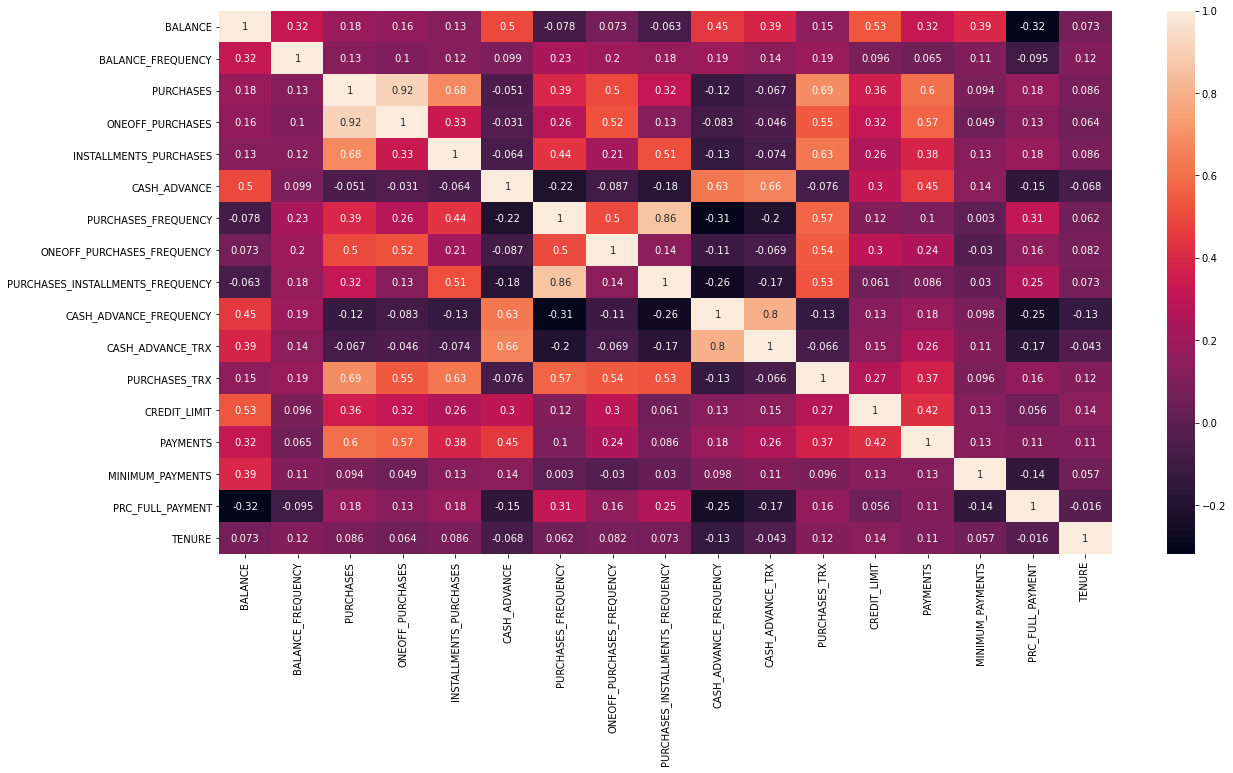

In [15]:
#obtain the correlation matrix between features
correlations = creditcard_df.corr()
f,ax = plt.subplots(figsize=(20,10))#resize the matrix because it was so small
sns.heatmap(correlations,annot=True)

# **TASK #4: UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS**

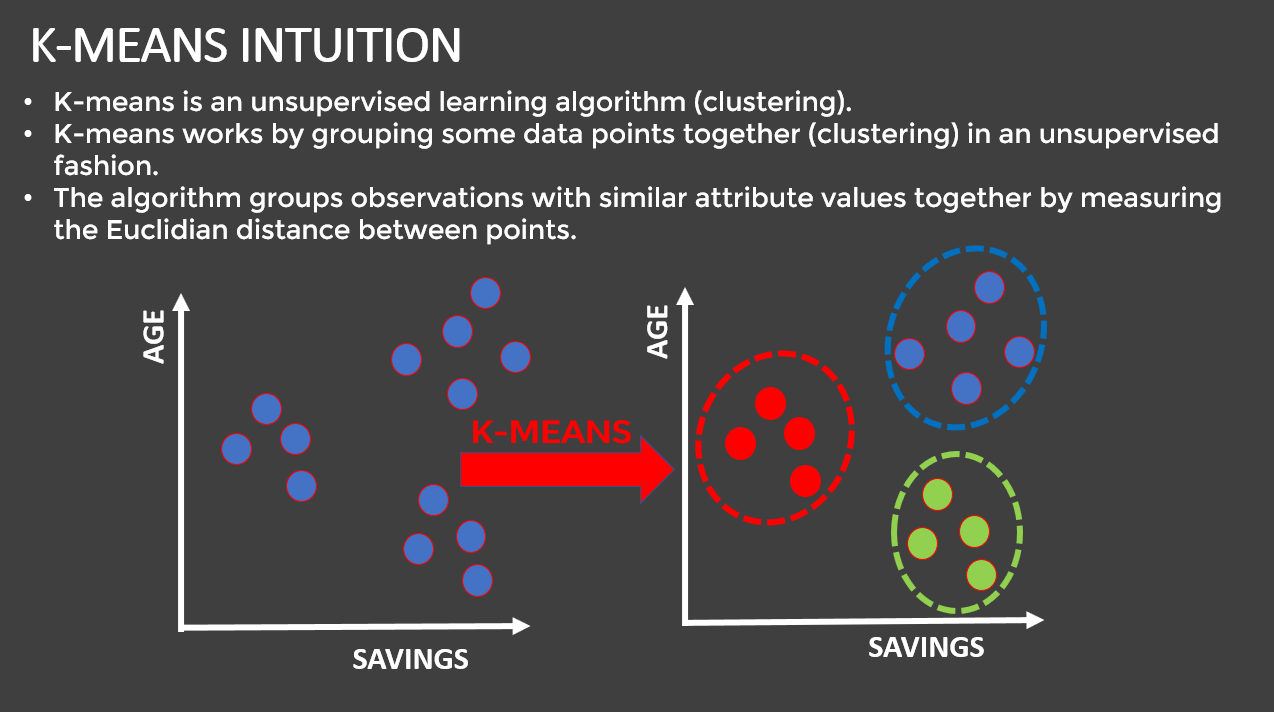

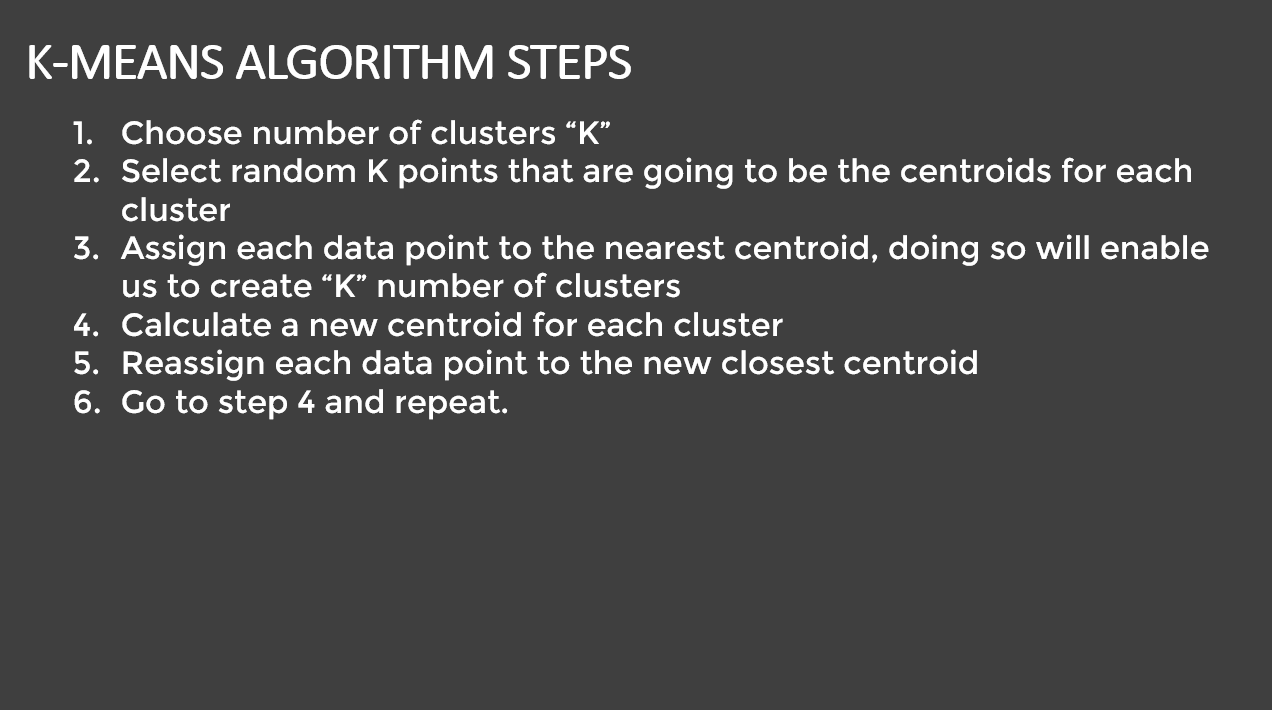

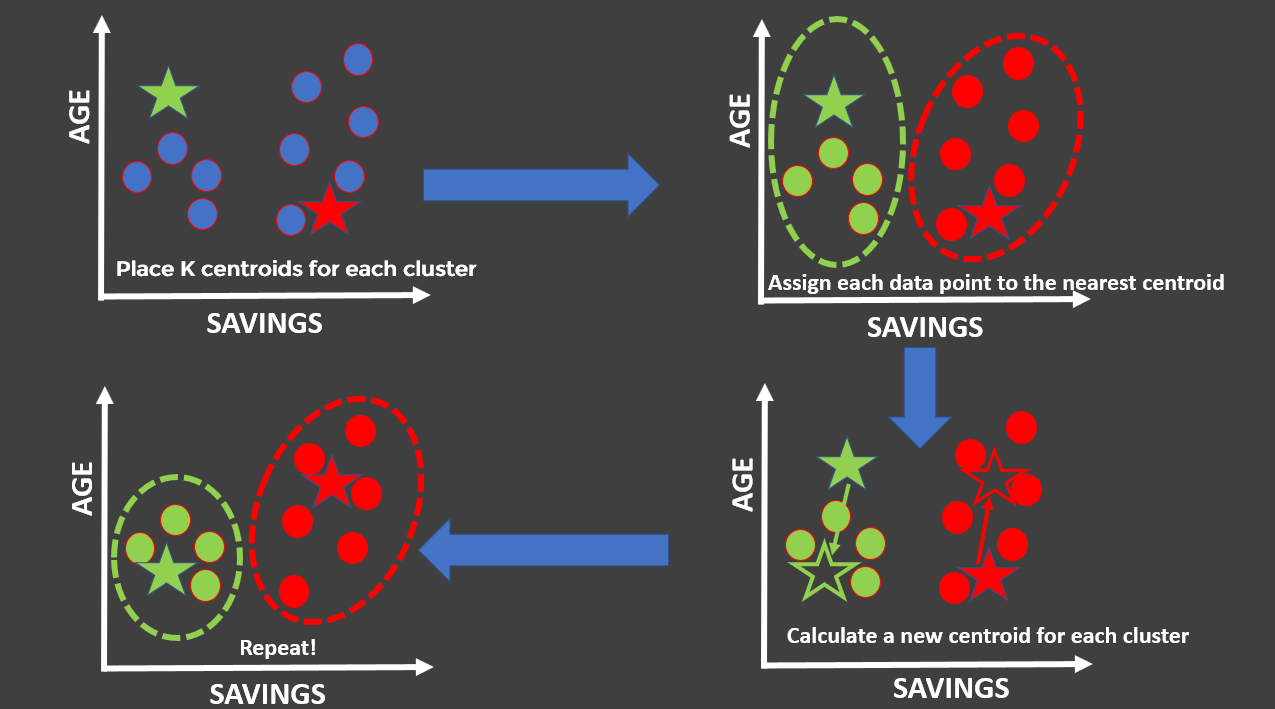

***RQ: K-means terminates after a fixed number of iterations is reached or when the centroid locations do not change between iterations***

# **TASK #5: LEARN HOW TO OBTAIN THE OPTIMAL NUMBER OF CLUSTERS(ELBOW METHOD)**

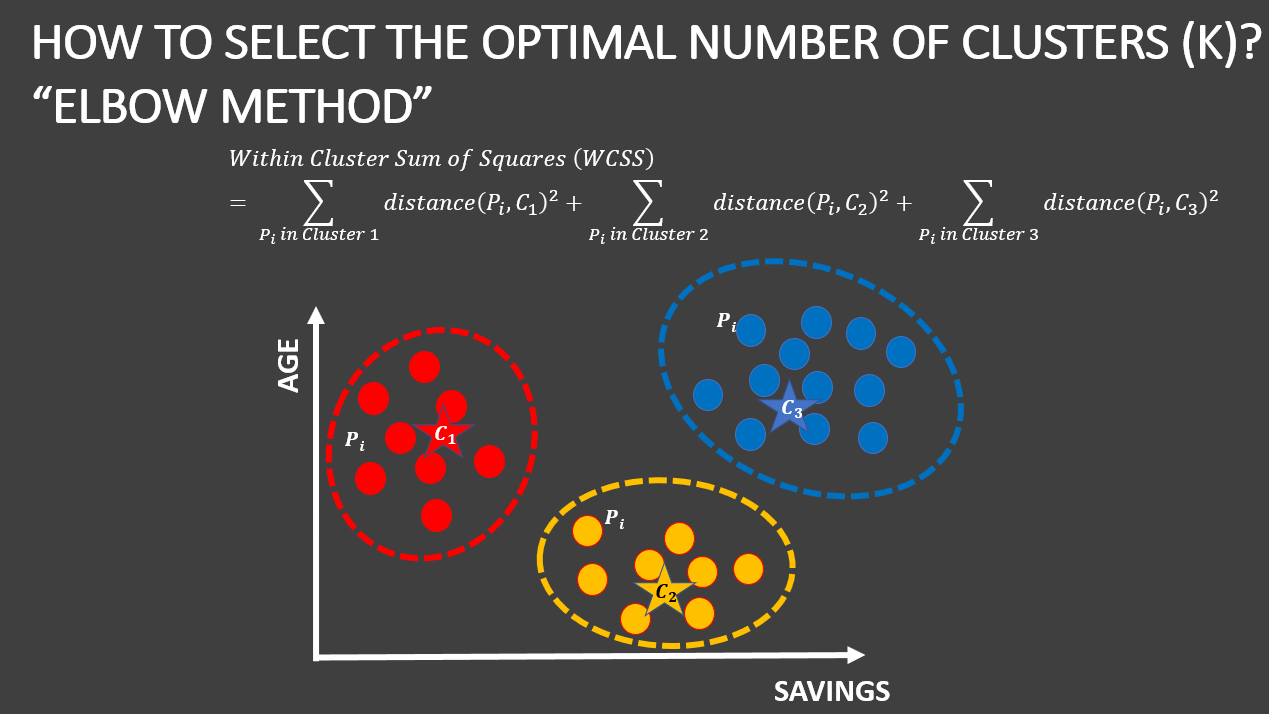

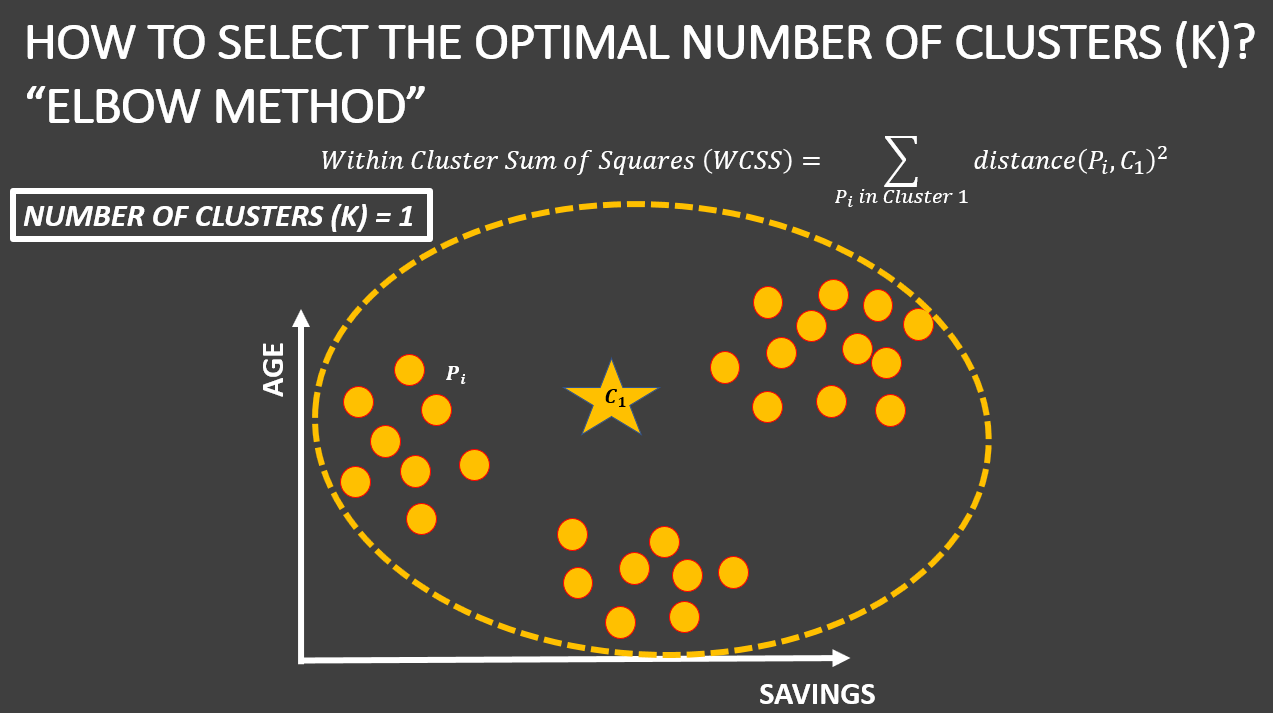

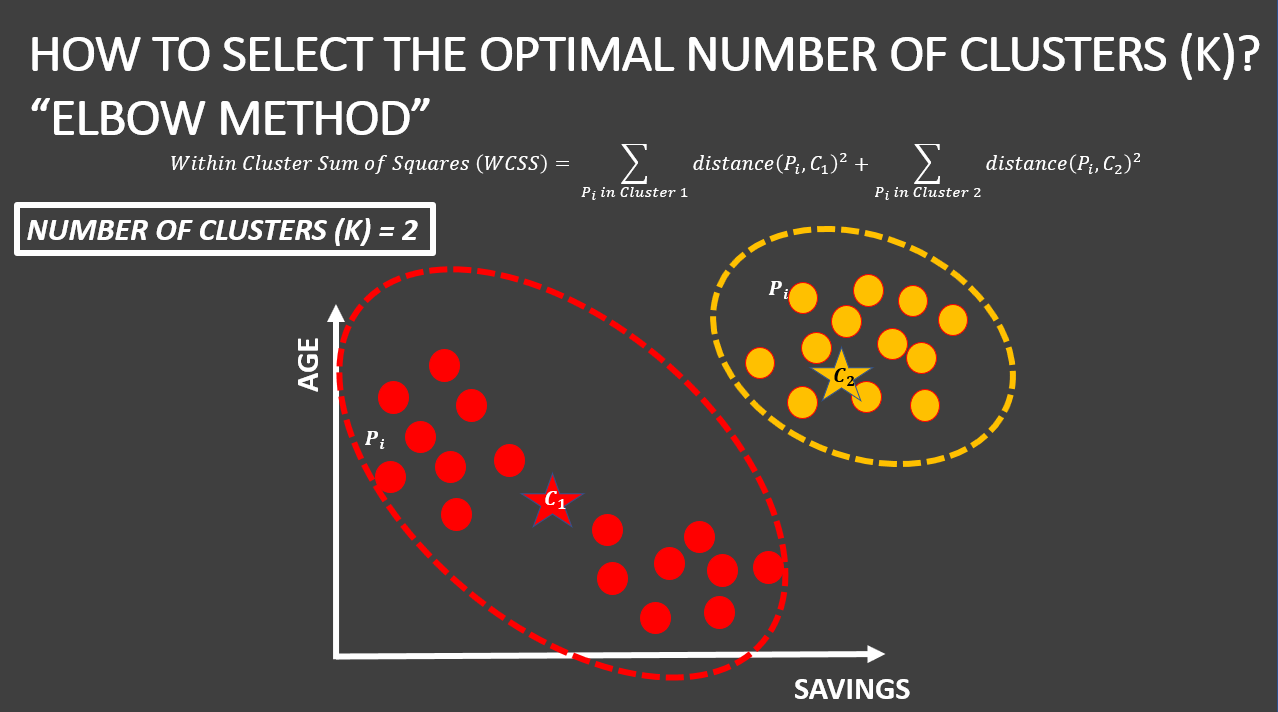

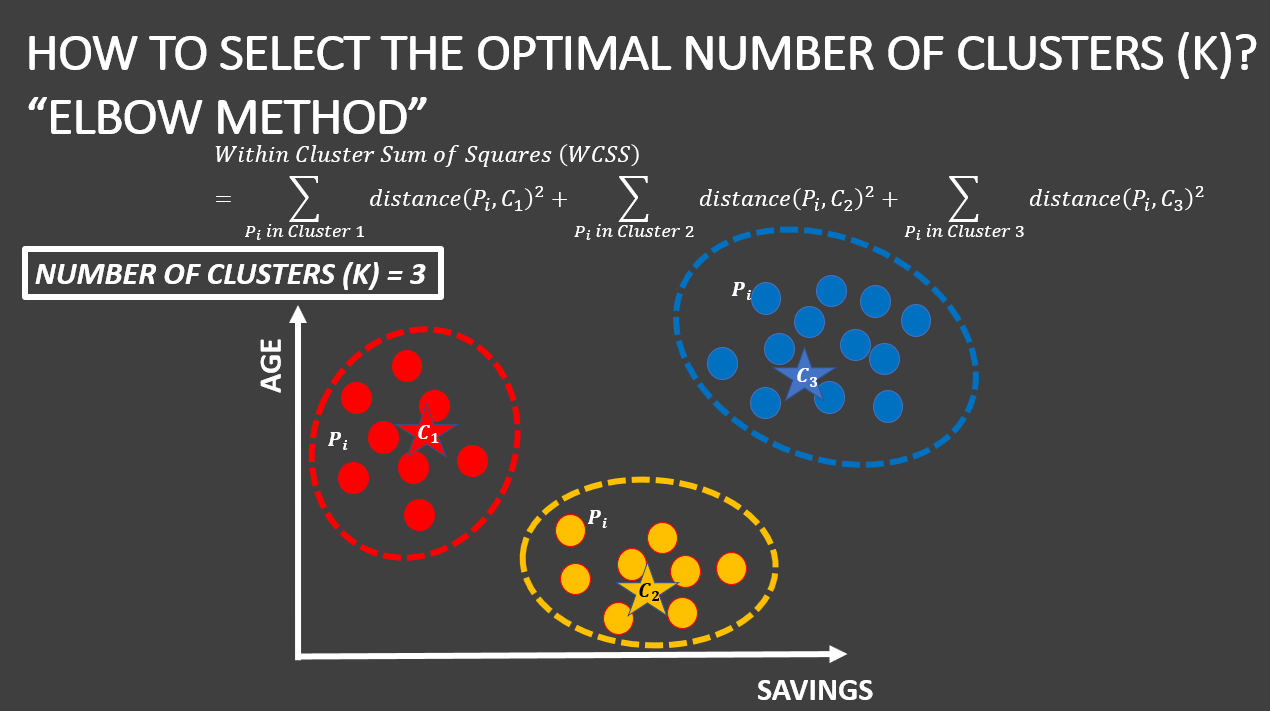

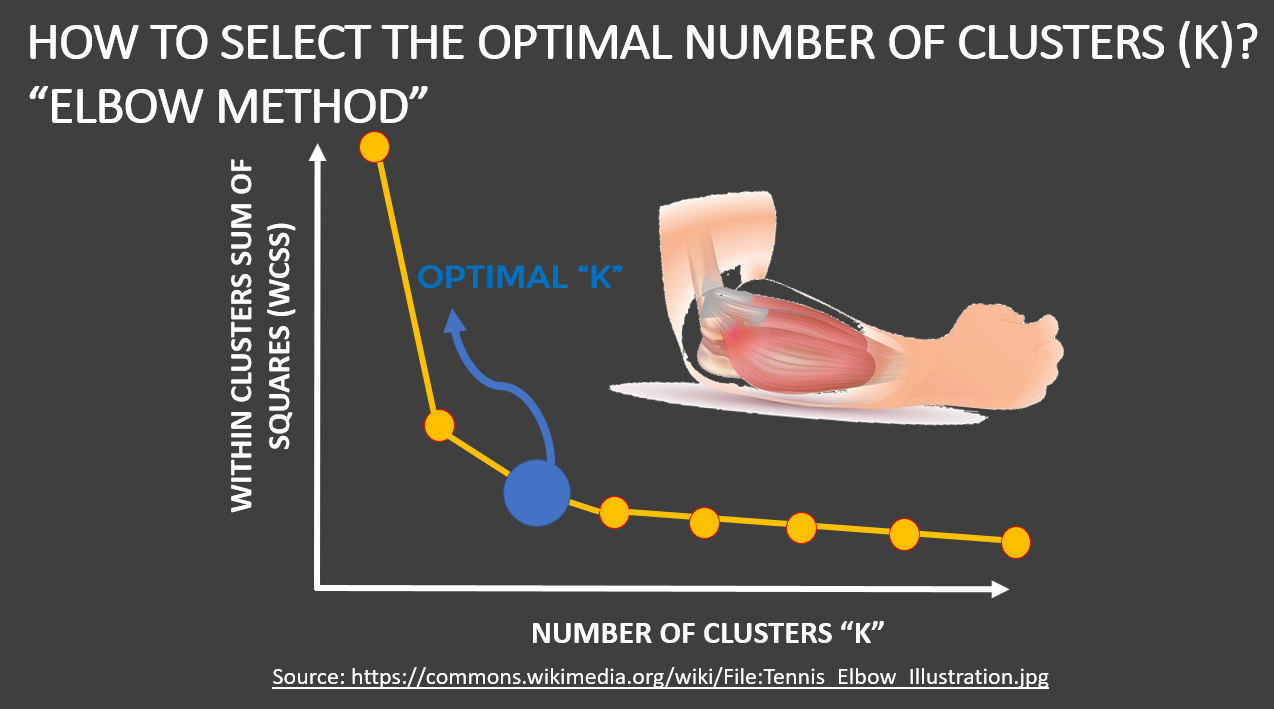

# **TASK #6: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD**


*   The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
*   if the line chart looks like an arm then the "elbow" on the arm is the value of k that is the best



In [16]:
# let's scale the data
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [17]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [18]:
from yellowbrick.cluster import KElbowVisualizer

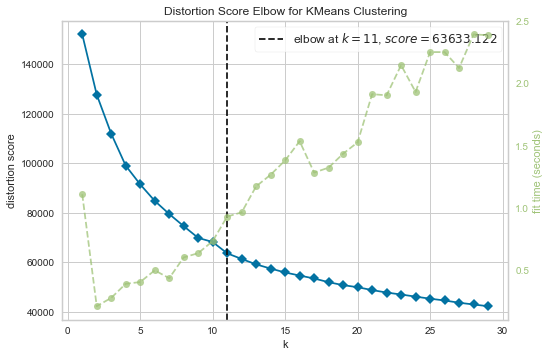

In [19]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,30))

visualizer.fit(creditcard_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

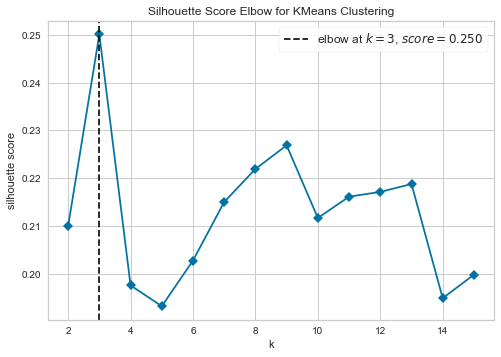

In [20]:
# Instantiate the clustering model and visualizer
#model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,16), metric='silhouette', timings=False)

visualizer.fit(creditcard_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# **TASK #7: APPLY K-MEANS METHOD**

In [21]:
kmeans = KMeans(3)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_#labels associated to each data point

In [22]:
kmeans.cluster_centers_

array([[-0.36754673, -0.17725627, -0.23240026, -0.2038891 , -0.17482512,
        -0.30975498, -0.06225017, -0.23403148, -0.04818605, -0.33445231,
        -0.29875729, -0.24322305, -0.33601548, -0.28431289, -0.13553191,
         0.00783832, -0.02850095],
       [ 1.16548758,  0.34103571, -0.28852722, -0.20695761, -0.30207032,
         1.37705476, -0.63965444, -0.30659342, -0.55053833,  1.55797342,
         1.3381713 , -0.3644726 ,  0.60280864,  0.44288506,  0.3991497 ,
        -0.41029275, -0.12346171],
       [ 0.31504394,  0.43975901,  1.5344803 ,  1.28610599,  1.26503637,
        -0.24860001,  1.14329417,  1.56613815,  0.95712867, -0.36103258,
        -0.2528054 ,  1.68733423,  0.89049821,  0.84094027,  0.15604356,
         0.49516618,  0.3028718 ]])

In [23]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.367547         -0.177256 -0.232400        -0.203889   
1  1.165488          0.341036 -0.288527        -0.206958   
2  0.315044          0.439759  1.534480         1.286106   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.174825    -0.309755           -0.062250   
1              -0.302070     1.377055           -0.639654   
2               1.265036    -0.248600            1.143294   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.234031                        -0.048186   
1                  -0.306593                        -0.550538   
2                   1.566138                         0.957129   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.334452        -0.298757     -0.243223    -0.336015   
1               1.557973         1.338171     -0.364473     0.602809   
2              -0.361033        -0.252805      1.687334     0.890498   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.284313        -0.135532         0.007838 -0.028501  
1  0.442885         0.399150        -0.410293 -0.123462  
2  0.840940         0.156044         0.495166  0.302872

In [24]:
#to understand what these numbers mean,let 's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

#First Custmers cluster (Transactors): they pay least amount of interest charges and careful with their money , Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 




BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0   799.457342          0.835280   506.678099       254.023232   
1  3990.338850          0.958059   386.761982       248.930119   
2  2220.212200          0.981446  4281.645643      2727.109902   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             252.975455   329.300443            0.465367   
1             137.909206  3866.619281            0.233626   
2            1555.024340   457.545286            0.949210   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.132642                         0.345287   
1                   0.110995                         0.145639   
2                   0.669667                         0.744825   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.068217         1.210028      8.664217  3271.887643   
1               0.446911        12.380863      5.650407  6687.713912   
2               0.062898         1.523616     56.650651  7734.446254   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   910.085880       548.355149         0.156007  11.479177  
1  3015.252697      1794.408088         0.033711  11.352095  
2  4167.583524      1227.859483         0.298542  11.922638

In [25]:
#concatenate the labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df , pd.DataFrame({'cluster':labels})],axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

# **TASK 8: APPLY PRINCIPAL COMPENENT ANALYSIS AND VISUALIZE THE RESULTS**

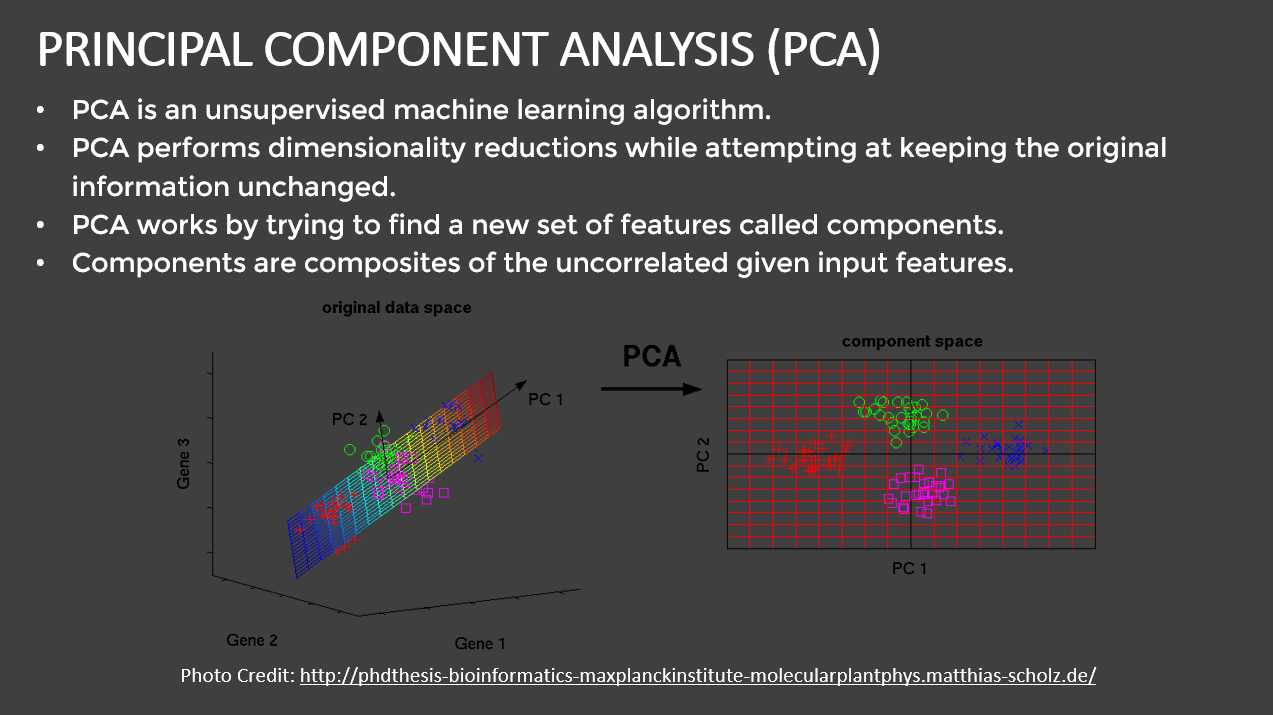

In [26]:
#obtain the principal compenent analysis (PCA)
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)

In [27]:
#create a dataframe with the two components 
pca_df = pd.DataFrame(data= principal_comp, columns=['pca1' , 'pca2'])
pca_df.head()

pca1      pca2
0 -1.682211 -1.076468
1 -1.138243  2.506379
2  0.969694 -0.383544
3 -0.873660  0.043243
4 -1.599417 -0.688616

In [28]:
# concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682211 -1.076468        0
1 -1.138243  2.506379        1
2  0.969694 -0.383544        0
3 -0.873660  0.043243        0
4 -1.599417 -0.688616        0

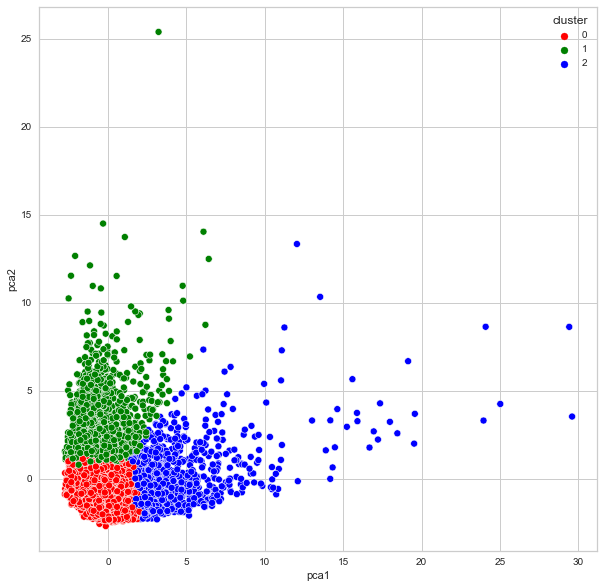

In [29]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.show()

In [30]:
import plotly.express as px


In [31]:
from sklearn.decomposition import PCA


pca1 = PCA(n_components=3)
components = pca1.fit_transform(creditcard_df_scaled)
total_var = pca1.explained_variance_ratio_.sum() * 100


In [32]:
#create a dataframe with the 3 components 
df_pca = pd.DataFrame(data= components, columns=['pca1' , 'pca2', 'pca3'])
df_pca.head()

pca1      pca2      pca3
0 -1.682221 -1.076451  0.488585
1 -1.138300  2.506473  0.601333
2  0.969683 -0.383521  0.102328
3 -0.873629  0.043164  1.460264
4 -1.599434 -0.688581  0.365155

In [33]:
# concatenate the clusters labels to the dataframe
df_pca = pd.concat([df_pca,pd.DataFrame({'cluster': labels})], axis = 1)
df_pca.head()

pca1      pca2      pca3  cluster
0 -1.682221 -1.076451  0.488585        0
1 -1.138300  2.506473  0.601333        1
2  0.969683 -0.383521  0.102328        0
3 -0.873629  0.043164  1.460264        0
4 -1.599434 -0.688581  0.365155        0

In [34]:
fig = px.scatter_3d(
    df_pca, x='pca1', y='pca2', z='pca3', color=df_pca['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'pca1': 'pca1', 'pca2': 'pca2', 'pca3': 'pca3'}
)
fig.show()

In [35]:
pca2 = PCA()
pca2.fit(creditcard_df_scaled)
exp_var_cumul = np.cumsum(pca2.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)